# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
import pandas as pd
import csv
import numpy as np
import json
import requests
import matplotlib.pyplot as plt
import datetime
import scipy.stats as st
from scipy.stats import linregress
from api_keys import weather_api_key
from citipy import citipy
import time

   
file_to_load = ("worldcities.csv")
cities_data = pd.read_csv(file_to_load, sep = ',')
df=pd.DataFrame(cities_data)


In [2]:
#Randomly select at least 500 unique (non-repeat) cities based on latitude and longitude.
# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

603

## Generate Cities List

In [3]:
List_Cities_df = df['city'].head(643)
len(List_Cities_df)


643

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [4]:
url = "http://api.openweathermap.org/data/2.5/weather?"
city = List_Cities_df
print(f"Beginning Data Retrieval")
print(f"---------------------------------")
# Build query URL
Latitude=[]
Longitude =[]
Temperature= []
Humidity = []
Wind_Speed = []
Cloudiness = []
List_city = []
Max_Temp= []
Date= []
Country = []
metrics= "Imperial"
i = 0
j = 1
for city in List_Cities_df:
    time.sleep(1)
    query_url = url + "appid=" + weather_api_key + "&q=" + city + "&units=" + metrics
    weather_response = requests.get(query_url)
    weather_json = weather_response.json()
       
    try:
        Latitude.append(weather_json['coord']['lat'])
        Longitude.append(weather_json['coord']['lon'])
        Max_Temp.append(weather_json['main']['temp_max'])
        Temperature.append(weather_json['main']['temp'])
        Humidity.append(weather_json['main']['humidity'])
        Wind_Speed.append(weather_json['wind']['speed'])
        Cloudiness.append(weather_json['clouds']['all'])
        Date.append(weather_json['dt'])
        Country.append(weather_json['sys']['country'])
        if i >= 50:
            #time.sleep(30)
            i = 1
            j += 1
            List_city.append(city)
        else:
            i += 1
            List_city.append(city)
        
        print(f'Processing Record {i} of Set {j} | {city}')
    except KeyError:
        print(f'{city} not found. Skipping to next city...')
        
        
        #List_city.append(city)
        #print(f"Processing Record | {city}")  
    #except:
       # print(f"{city} not found. Skipping")

        
print(f"------------------------------------------------------------------------")
print(f"Data Retreivel Complete")
print(f"------------------------------------------------------------------------")
       
         
#time.sleep(n) - This is to wait n seconds
#create .gitignore file
# Get the temperature from the response


Beginning Data Retrieval
---------------------------------
Processing Record 1 of Set 1 | Tokyo
Processing Record 2 of Set 1 | Jakarta
Processing Record 3 of Set 1 | Delhi
Processing Record 4 of Set 1 | Mumbai
Processing Record 5 of Set 1 | Manila
Processing Record 6 of Set 1 | Shanghai
Processing Record 7 of Set 1 | São Paulo
Processing Record 8 of Set 1 | Seoul
Processing Record 9 of Set 1 | Mexico City
Processing Record 10 of Set 1 | Guangzhou
Processing Record 11 of Set 1 | Beijing
Processing Record 12 of Set 1 | Cairo
Processing Record 13 of Set 1 | New York
Kolkāta not found. Skipping to next city...
Processing Record 14 of Set 1 | Moscow
Processing Record 15 of Set 1 | Bangkok
Processing Record 16 of Set 1 | Buenos Aires
Processing Record 17 of Set 1 | Shenzhen
Processing Record 18 of Set 1 | Dhaka
Processing Record 19 of Set 1 | Lagos
Processing Record 20 of Set 1 | Istanbul
Processing Record 21 of Set 1 | Ōsaka
Processing Record 22 of Set 1 | Karachi
Processing Record 23 of Se

Processing Record 1 of Set 5 | Jeddah
Processing Record 2 of Set 5 | Loudi
Processing Record 3 of Set 5 | Deyang
Processing Record 4 of Set 5 | Qingyuan
Processing Record 5 of Set 5 | Wuhu
Processing Record 6 of Set 5 | Hechi
Processing Record 7 of Set 5 | Seattle
Processing Record 8 of Set 5 | Binzhou
Processing Record 9 of Set 5 | Yokohama
Processing Record 10 of Set 5 | Liuzhou
Baojishi not found. Skipping to next city...
Processing Record 11 of Set 5 | Guang’an
Processing Record 12 of Set 5 | Hanzhong
Processing Record 13 of Set 5 | Kabul
Processing Record 14 of Set 5 | Zaozhuang
Processing Record 15 of Set 5 | Berlin
Processing Record 16 of Set 5 | Anshan
Processing Record 17 of Set 5 | Lanzhou
Processing Record 18 of Set 5 | Chengde
Processing Record 19 of Set 5 | San Francisco
Processing Record 20 of Set 5 | Puyang
Processing Record 21 of Set 5 | Suining
Processing Record 22 of Set 5 | Jiaozuo
Processing Record 23 of Set 5 | Bengbu
Processing Record 24 of Set 5 | Montréal
Proces

Processing Record 49 of Set 8 | Tainan
Processing Record 50 of Set 8 | Zhuhai
Processing Record 1 of Set 9 | Bucharest
Processing Record 2 of Set 9 | Wuwei
Bhopāl not found. Skipping to next city...
Processing Record 3 of Set 9 | Curitiba
Processing Record 4 of Set 9 | Multan
Processing Record 5 of Set 9 | Xiping
Processing Record 6 of Set 9 | Asunción
Processing Record 7 of Set 9 | Saidu Sharif
Processing Record 8 of Set 9 | Hamburg
Processing Record 9 of Set 9 | Meru
Processing Record 10 of Set 9 | Brazzaville
Processing Record 11 of Set 9 | Orlando
Processing Record 12 of Set 9 | Mersin
Processing Record 13 of Set 9 | Kyōto
Processing Record 14 of Set 9 | Manaus
Processing Record 15 of Set 9 | Liaoyang
Processing Record 16 of Set 9 | Baiyin
Processing Record 17 of Set 9 | San Jose
Processing Record 18 of Set 9 | Warsaw
Processing Record 19 of Set 9 | Shengli
Processing Record 20 of Set 9 | Lubumbashi
Processing Record 21 of Set 9 | Haikou
Processing Record 22 of Set 9 | Damascus
Shu

Processing Record 33 of Set 12 | Jacksonville
Processing Record 34 of Set 12 | Medina
Processing Record 35 of Set 12 | Srīnagar
Processing Record 36 of Set 12 | Omsk
Cilacap not found. Skipping to next city...
Processing Record 37 of Set 12 | Bandar Lampung
Processing Record 38 of Set 12 | Samara
Processing Record 39 of Set 12 | Guankou
Processing Record 40 of Set 12 | Ulsan
Processing Record 41 of Set 12 | Dingzhou
Processing Record 42 of Set 12 | Campinas
Processing Record 43 of Set 12 | Lianyuan
Processing Record 44 of Set 12 | Rongcheng
Processing Record 45 of Set 12 | Kaiyuan
Processing Record 46 of Set 12 | Nay Pyi Taw
Processing Record 47 of Set 12 | Dakar
Processing Record 48 of Set 12 | Zhuji
Processing Record 49 of Set 12 | Kigali
Processing Record 50 of Set 12 | Zapopan
Processing Record 1 of Set 13 | Leiyang
Processing Record 2 of Set 13 | Santiago
Processing Record 3 of Set 13 | Dadukou
Processing Record 4 of Set 13 | Xiantao
Processing Record 5 of Set 13 | Amritsar
Proces

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [5]:
Citi_Data_Dict = {
    "City":List_city,
    "Latitude":Latitude,
    "Longitude":Longitude,
    "Max_Temp":Max_Temp,
    "Humidity":Humidity,
    "Wind_Speed":Wind_Speed,
    "Cloudiness":Cloudiness,
    "Date":Date,
    "Country":Country    
    }
Citi_Data_DF = pd.DataFrame(Citi_Data_Dict)
Citi_Data_DF.to_csv(r'..\starter_code\City_data.csv', index = False)

Citi_Data_DF

,City,Latitude,Longitude,Max_Temp,Humidity,Wind_Speed,Cloudiness,Date,Country
0,Tokyo,35.6895,139.6917,65.44,43,8.01,20,1635470149,JP
1,Jakarta,-6.2146,106.8451,83.52,78,5.75,100,1635470411,ID
2,Delhi,28.6667,77.2167,62.69,88,0.00,0,1635470179,IN
3,Mumbai,19.0144,72.8479,78.78,44,4.61,40,1635470303,IN
4,Manila,14.6042,120.9822,87.13,59,7.00,20,1635470220,PH
...,...,...,...,...,...,...,...,...,...
614,Zhoushan,30.0108,122.2047,67.86,57,8.52,90,1635471240,CN
615,Tbilisi,41.6941,44.8337,40.71,81,5.75,0,1635470957,GE
616,Ufa,54.7750,56.0375,34.97,90,10.27,100,1635470983,RU
617,Fès,34.0372,-4.9998,62.85,48,3.44,0,1635471244,MA


In [6]:
Citi_Data_DF.describe()

,Latitude,Longitude,Max_Temp,Humidity,Wind_Speed,Cloudiness,Date
count,619.000000,619.000000,619.000000,619.00000,619.000000,619.000000,6.190000e+02
mean,26.775259,63.310648,63.946252,68.23748,4.832617,49.339257,1.635471e+09
std,17.586721,74.445419,11.397579,18.95635,3.438171,41.205593,2.556495e+02
min,-36.866700,-123.119300,30.330000,1.00000,0.000000,0.000000,1.635470e+09
25%,22.806750,28.635200,57.200000,54.50000,2.315000,4.000000,1.635471e+09
50%,30.634000,105.893300,63.280000,69.00000,4.140000,45.000000,1.635471e+09
75%,36.857450,116.931800,72.310000,83.50000,6.540000,93.000000,1.635471e+09
max,59.894400,174.766700,91.310000,100.00000,18.990000,100.000000,1.635471e+09


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [7]:
#  Get the indices of cities that have humidity over 100%.
indexNames = Citi_Data_DF[ Citi_Data_DF['Humidity'] > 100 ].index
indexNames

Int64Index([], dtype='int64')

In [8]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".

Clean_City_Data = Citi_Data_DF.drop(indexNames , inplace=False)
#Clean_City_Data['Date']= datetime.fromtimestamp(Clean_City_Data['Date'])
Clean_City_Data

,City,Latitude,Longitude,Max_Temp,Humidity,Wind_Speed,Cloudiness,Date,Country
0,Tokyo,35.6895,139.6917,65.44,43,8.01,20,1635470149,JP
1,Jakarta,-6.2146,106.8451,83.52,78,5.75,100,1635470411,ID
2,Delhi,28.6667,77.2167,62.69,88,0.00,0,1635470179,IN
3,Mumbai,19.0144,72.8479,78.78,44,4.61,40,1635470303,IN
4,Manila,14.6042,120.9822,87.13,59,7.00,20,1635470220,PH
...,...,...,...,...,...,...,...,...,...
614,Zhoushan,30.0108,122.2047,67.86,57,8.52,90,1635471240,CN
615,Tbilisi,41.6941,44.8337,40.71,81,5.75,0,1635470957,GE
616,Ufa,54.7750,56.0375,34.97,90,10.27,100,1635470983,RU
617,Fès,34.0372,-4.9998,62.85,48,3.44,0,1635471244,MA


In [9]:
Clean_City_Data.describe()


,Latitude,Longitude,Max_Temp,Humidity,Wind_Speed,Cloudiness,Date
count,619.000000,619.000000,619.000000,619.00000,619.000000,619.000000,6.190000e+02
mean,26.775259,63.310648,63.946252,68.23748,4.832617,49.339257,1.635471e+09
std,17.586721,74.445419,11.397579,18.95635,3.438171,41.205593,2.556495e+02
min,-36.866700,-123.119300,30.330000,1.00000,0.000000,0.000000,1.635470e+09
25%,22.806750,28.635200,57.200000,54.50000,2.315000,4.000000,1.635471e+09
50%,30.634000,105.893300,63.280000,69.00000,4.140000,45.000000,1.635471e+09
75%,36.857450,116.931800,72.310000,83.50000,6.540000,93.000000,1.635471e+09
max,59.894400,174.766700,91.310000,100.00000,18.990000,100.000000,1.635471e+09


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

Text(0, 0.5, 'Max Temperature(F)')

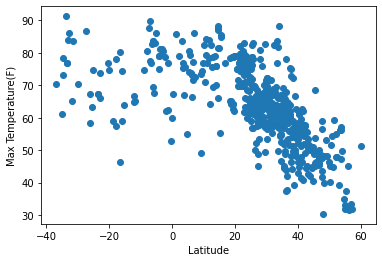

In [10]:
#catter_data = Updated_df[(Updated_df['Drug Regimen']== "Capomulin")]
#Scatter_Values = Scatter_data.groupby(['Mouse ID']).mean()
plt.scatter(Clean_City_Data['Latitude'],Clean_City_Data['Max_Temp'])
plt.xlabel('Latitude')
plt.ylabel('Max Temperature(F)')

## Latitude vs. Humidity Plot

Text(0, 0.5, 'Humidity(%)')

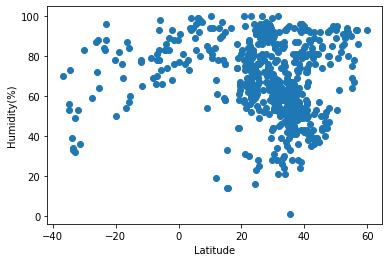

In [11]:
plt.scatter(Clean_City_Data['Latitude'],Clean_City_Data['Humidity'])
plt.xlabel('Latitude')
plt.ylabel('Humidity(%)')

## Latitude vs. Cloudiness Plot

Text(0, 0.5, 'Cloudiness(%)')

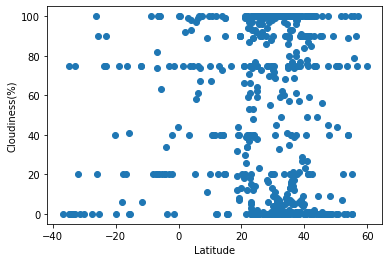

In [12]:
plt.scatter(Clean_City_Data['Latitude'],Clean_City_Data['Cloudiness'])
plt.xlabel('Latitude')
plt.ylabel('Cloudiness(%)')

## Latitude vs. Wind Speed Plot

Text(0, 0.5, 'Wind Speed(mph)')

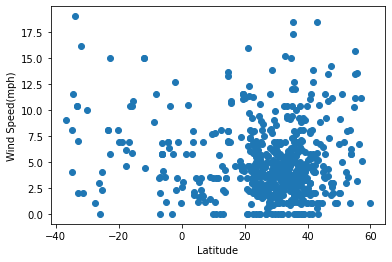

In [13]:
plt.scatter(Clean_City_Data['Latitude'],Clean_City_Data['Wind_Speed'])
plt.xlabel('Latitude')
plt.ylabel('Wind Speed(mph)')

## Linear Regression

In [14]:
#Creating Northern Hemisphere and Southern Hemisphere Dataframes

Southern_Hemi_Cities= Clean_City_Data[(Clean_City_Data.Latitude < 0)]
Northern_Hemi_Cities= Clean_City_Data[(Clean_City_Data.Latitude > 0)]


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is :-0.7358775881895171


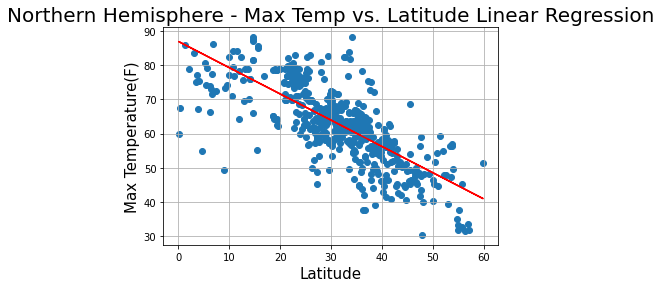

In [15]:
x_value=Northern_Hemi_Cities['Latitude']
y_value=Northern_Hemi_Cities['Max_Temp']
result=linregress(x_value,y_value)
slope,intercept=result[:2]
regressvalues=x_value*slope +intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
corr = st.pearsonr(x_value, y_value)[0]
plt.scatter(x_value,y_value)
plt.title('Northern Hemisphere - Max Temp vs. Latitude Linear Regression',fontsize = 20)
plt.xlabel('Latitude',fontsize = 15)
plt.ylabel('Max Temperature(F)',fontsize = 15)
plt.plot(x_value,regressvalues,"r-")
plt.annotate(line_eq,(10,20),fontsize=12,color="red")
plt.grid()
print(f'The r-value is :{corr}')
plt.savefig('Northern Hemisphere - Max Temp vs. Latitude Linear Regression.png', bbox_inches = "tight")
plt.show()


####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is :0.0740975786847567


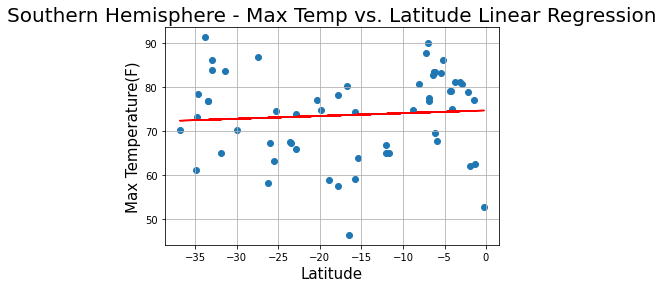

In [16]:
x_value=Southern_Hemi_Cities['Latitude']
y_value=Southern_Hemi_Cities['Max_Temp']
result=linregress(x_value,y_value)
slope,intercept=result[:2]
regressvalues=x_value*slope +intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
corr = st.pearsonr(x_value, y_value)[0]
plt.scatter(x_value,y_value)
plt.title('Southern Hemisphere - Max Temp vs. Latitude Linear Regression',fontsize = 20)
plt.xlabel('Latitude',fontsize = 15)
plt.ylabel('Max Temperature(F)',fontsize = 15)
plt.plot(x_value,regressvalues,"r-")
plt.annotate(line_eq,(-35,95),fontsize=12,color="red")
plt.grid()
print(f'The r-value is :{corr}')
plt.savefig('Southern Hemisphere - Max Temp vs. Latitude Linear Regression.png', bbox_inches = "tight")
plt.show()

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is :-0.16792227565996912


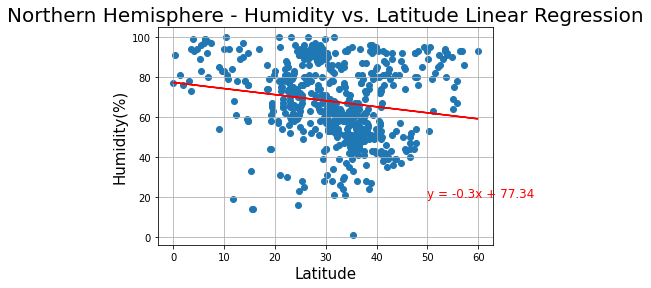

In [17]:
x_value=Northern_Hemi_Cities['Latitude']
y_value=Northern_Hemi_Cities['Humidity']
result=linregress(x_value,y_value)
slope,intercept=result[:2]
regressvalues=x_value*slope +intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
corr = st.pearsonr(x_value, y_value)[0]
plt.scatter(x_value,y_value)
plt.title('Northern Hemisphere - Humidity vs. Latitude Linear Regression',fontsize = 20)
plt.xlabel('Latitude',fontsize = 15)
plt.ylabel('Humidity(%)',fontsize = 15)
plt.plot(x_value,regressvalues,"r-")
plt.annotate(line_eq,(50,20),fontsize=12,color="red")
plt.grid()
print(f'The r-value is :{corr}')
plt.savefig('Northern Hemisphere - Humidity vs. Latitude Linear Regression.png', bbox_inches = "tight")
plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is :0.5716898792817002


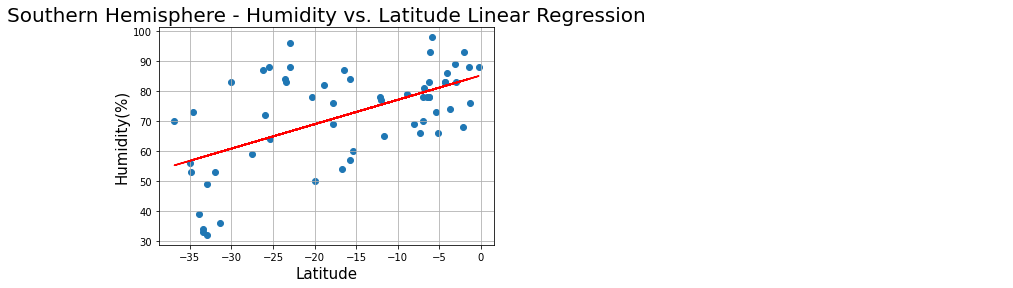

In [18]:
x_value=Southern_Hemi_Cities['Latitude']
y_value=Southern_Hemi_Cities['Humidity']
result=linregress(x_value,y_value)
slope,intercept=result[:2]
regressvalues=x_value*slope +intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
corr = st.pearsonr(x_value, y_value)[0]
plt.scatter(x_value,y_value)
plt.title('Southern Hemisphere - Humidity vs. Latitude Linear Regression',fontsize = 20)
plt.xlabel('Latitude',fontsize = 15)
plt.ylabel('Humidity(%)',fontsize = 15)
plt.plot(x_value,regressvalues,"r-")
plt.annotate(line_eq,(50,20),fontsize=12,color="red")
plt.grid()
print(f'The r-value is :{corr}')
plt.savefig('Southern Hemisphere - Humidity vs. Latitude Linear Regression.png', bbox_inches = "tight")
plt.show()


####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is :-0.1106667342916128


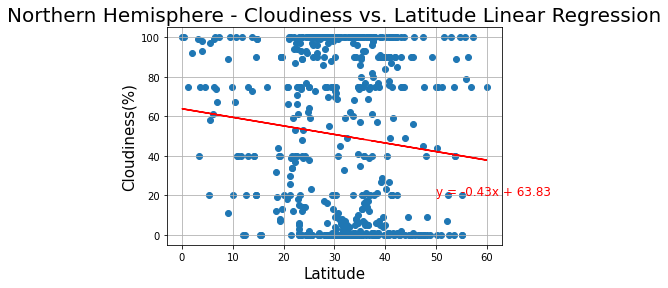

In [19]:
x_value=Northern_Hemi_Cities['Latitude']
y_value=Northern_Hemi_Cities['Cloudiness']
result=linregress(x_value,y_value)
slope,intercept=result[:2]
regressvalues=x_value*slope +intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
corr = st.pearsonr(x_value, y_value)[0]
plt.scatter(x_value,y_value)
plt.title('Northern Hemisphere - Cloudiness vs. Latitude Linear Regression',fontsize = 20)
plt.xlabel('Latitude',fontsize = 15)
plt.ylabel('Cloudiness(%)',fontsize = 15)
plt.plot(x_value,regressvalues,"r-")
plt.annotate(line_eq,(50,20),fontsize=12,color="red")
plt.grid()
print(f'The r-value is :{corr}')
plt.savefig('Northern Hemisphere - Cloudiness vs. Latitude Linear Regression.png', bbox_inches = "tight")
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is :0.26905205133273186


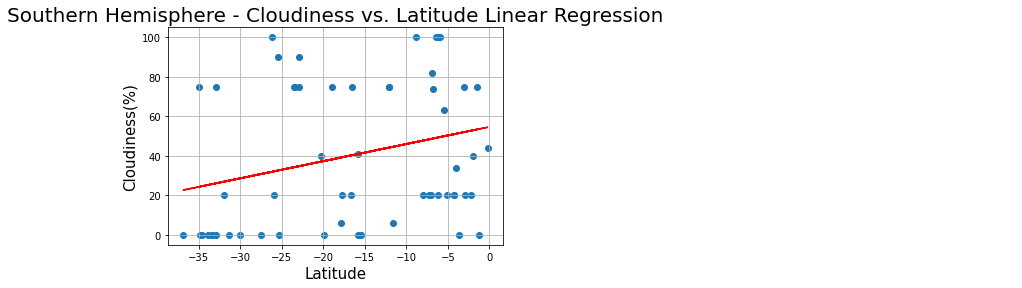

In [20]:
x_value=Southern_Hemi_Cities['Latitude']
y_value=Southern_Hemi_Cities['Cloudiness']
result=linregress(x_value,y_value)
slope,intercept=result[:2]
regressvalues=x_value*slope +intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
corr = st.pearsonr(x_value, y_value)[0]
plt.scatter(x_value,y_value)
plt.title('Southern Hemisphere - Cloudiness vs. Latitude Linear Regression',fontsize = 20)
plt.xlabel('Latitude',fontsize = 15)
plt.ylabel('Cloudiness(%)',fontsize = 15)
plt.plot(x_value,regressvalues,"r-")
plt.annotate(line_eq,(50,20),fontsize=12,color="red")
plt.grid()
print(f'The r-value is :{corr}')
plt.savefig('Southern Hemisphere - Cloudiness vs. Latitude Linear Regression.png', bbox_inches = "tight")
plt.show()

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is :-0.1106667342916128


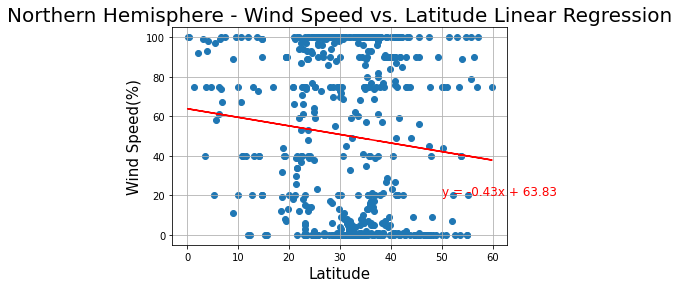

In [21]:
x_value=Northern_Hemi_Cities['Latitude']
y_value=Northern_Hemi_Cities['Cloudiness']
result=linregress(x_value,y_value)
slope,intercept=result[:2]
regressvalues=x_value*slope +intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
corr = st.pearsonr(x_value, y_value)[0]
plt.scatter(x_value,y_value)
plt.title('Northern Hemisphere - Wind Speed vs. Latitude Linear Regression',fontsize = 20)
plt.xlabel('Latitude',fontsize = 15)
plt.ylabel('Wind Speed(%)',fontsize = 15)
plt.plot(x_value,regressvalues,"r-")
plt.annotate(line_eq,(50,20),fontsize=12,color="red")
plt.grid()
print(f'The r-value is :{corr}')
plt.savefig('Northern Hemisphere - Wind Speed vs. Latitude Linear Regression.png', bbox_inches = "tight")
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is :0.26905205133273186


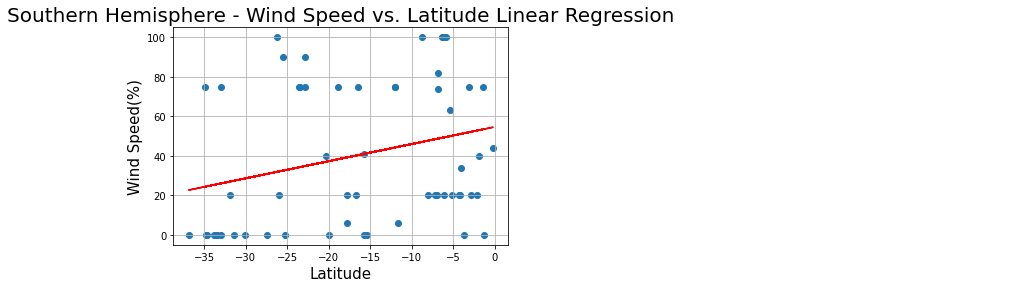

In [22]:
x_value=Southern_Hemi_Cities['Latitude']
y_value=Southern_Hemi_Cities['Cloudiness']
result=linregress(x_value,y_value)
slope,intercept=result[:2]
regressvalues=x_value*slope +intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
corr = st.pearsonr(x_value, y_value)[0]
plt.scatter(x_value,y_value)
plt.title('Southern Hemisphere - Wind Speed vs. Latitude Linear Regression',fontsize = 20)
plt.xlabel('Latitude',fontsize = 15)
plt.ylabel('Wind Speed(%)',fontsize = 15)
plt.plot(x_value,regressvalues,"r-")
plt.annotate(line_eq,(50,20),fontsize=12,color="red")
plt.grid()
print(f'The r-value is :{corr}')
plt.savefig('Southern Hemisphere - Wind Speed vs. Latitude Linear Regression.png', bbox_inches = "tight")
plt.show()
